In [87]:
import pandas as pd
import numpy as np
import missingno as msno
import datetime as dt
import matplotlib.pyplot as plt

In [88]:
df = pd.read_csv('DataExtract_v2.csv') #read in CSV file provided
df_PSA = pd.read_csv('PSA 03.13.csv') #read in CSV file provided

C:\Users\geogh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# DROP COLUMNS

In [89]:
df.columns

Index(['MyDealId', 'SfdcDealId', 'OpportunityNumber', 'BookingSystemName',
       'Assets', 'IsPrimary', 'segmentvalue', 'OpportunityTypeValue', 'DealId',
       'SFDCSUPPORTREQUESTID', 'CustomerNumber', 'dealstatusvalue',
       'RegionValue', 'CountryValue', 'OwnerID',
       'TechnologySolutionOwnerBadge', 'SMEID', 'LOBNAME', 'Technologyname',
       'Fiscal Year', 'Fiscal Quarter', 'Fiscal Week', 'IntakeDate',
       'AssignedDate', 'FirstDeliverableProvidedDate',
       'FinalDeliverableProvidedDate', 'ContractDecisionDate',
       'EstimatedAwardDate', 'EstimatedDeliveryDate', 'RespondedToSales',
       'SfdcDeliverableDueDate', 'ContractRevenue', 'LineItemRevenue',
       'dealtechnologytags'],
      dtype='object')

In [90]:
df = df[df['RegionValue'] == "AMER"]

In [91]:
df = df.drop(columns=['SfdcDealId','DealId','SFDCSUPPORTREQUESTID','OpportunityNumber','segmentvalue','ContractDecisionDate',
       'EstimatedAwardDate', 'EstimatedDeliveryDate','SfdcDeliverableDueDate'])

In [92]:
df = df[df['dealstatusvalue'] != 'Lost']

In [93]:
df = df[df['dealstatusvalue'] != 'Cancelled']

In [94]:
df = df[df['dealstatusvalue'] != 'No Opportunity']

In [95]:
df = df[df['dealstatusvalue'] != 'Inactive']

In [96]:
df = df[df['dealstatusvalue'] != 'Solutioning']

# FILTER OUT PSAS NOT IN PROVIDED LIST 

In [97]:
#Rows before
len(df)

8435

#### Manage Null TechnologySolutionOwnerBadge

In [98]:
df['TechnologySolutionOwnerBadge'].isna().sum()

128

In [99]:
#TechnologySolutionOwnerBadge
mask = df['TechnologySolutionOwnerBadge'].isna()
df['TechnologySolutionOwnerBadge'] = np.where(mask, df['OwnerID'], df['TechnologySolutionOwnerBadge'])

#### Merge dfs - Inner Join

In [100]:
df = df.merge(df_PSA, left_on='TechnologySolutionOwnerBadge', right_on='Employee ID', how = 'inner')
df = df.drop(columns = 'Employee ID')
#Rows after merge
len(df)

6263

In [101]:
#Check
print('TechnologySolutionOwnerBadge Nulls: ', df['TechnologySolutionOwnerBadge'].isna().sum())

TechnologySolutionOwnerBadge Nulls:  0


In [102]:
print('Number of unique PSAs: ', len(df['TechnologySolutionOwnerBadge'].value_counts()))

Number of unique PSAs:  119


## Null Management

In [103]:
#correlation between columns
df.corr()

,MyDealId,Assets,IsPrimary,OwnerID,TechnologySolutionOwnerBadge,SMEID,Fiscal Year,Fiscal Week,ContractRevenue,LineItemRevenue,Time in Job Profile
MyDealId,1.000000,0.075723,0.165680,0.351797,0.349229,0.389696,0.854487,0.950031,-0.002848,-0.003972,-0.166024
Assets,0.075723,1.000000,0.023730,-0.072428,-0.070853,0.036169,0.074800,0.080236,0.071098,0.147685,-0.021170
IsPrimary,0.165680,0.023730,1.000000,0.103166,0.109307,-0.064892,0.190117,0.200641,-0.162791,-0.016877,-0.066140
OwnerID,0.351797,-0.072428,0.103166,1.000000,0.986308,0.838396,0.290784,0.341758,0.042965,0.018909,-0.218441
TechnologySolutionOwnerBadge,0.349229,-0.070853,0.109307,0.986308,1.000000,0.845170,0.290610,0.340871,0.041925,0.018988,-0.227899
SMEID,0.389696,0.036169,-0.064892,0.838396,0.845170,1.000000,0.332169,0.374155,0.108494,0.068770,-0.327570
Fiscal Year,0.854487,0.074800,0.190117,0.290784,0.290610,0.332169,1.000000,0.964426,-0.058490,-0.040425,-0.162062
Fiscal Week,0.950031,0.080236,0.200641,0.341758,0.340871,0.374155,0.964426,1.000000,-0.033950,-0.024593,-0.170009
ContractRevenue,-0.002848,0.071098,-0.162791,0.042965,0.041925,0.108494,-0.058490,-0.033950,1.000000,0.662163,0.027853
LineItemRevenue,-0.003972,0.147685,-0.016877,0.018909,0.018988,0.068770,-0.040425,-0.024593,0.662163,1.000000,0.019927


Text(0.5, 1.0, 'Correlations of Missing Values Only')

<Figure size 432x288 with 0 Axes>

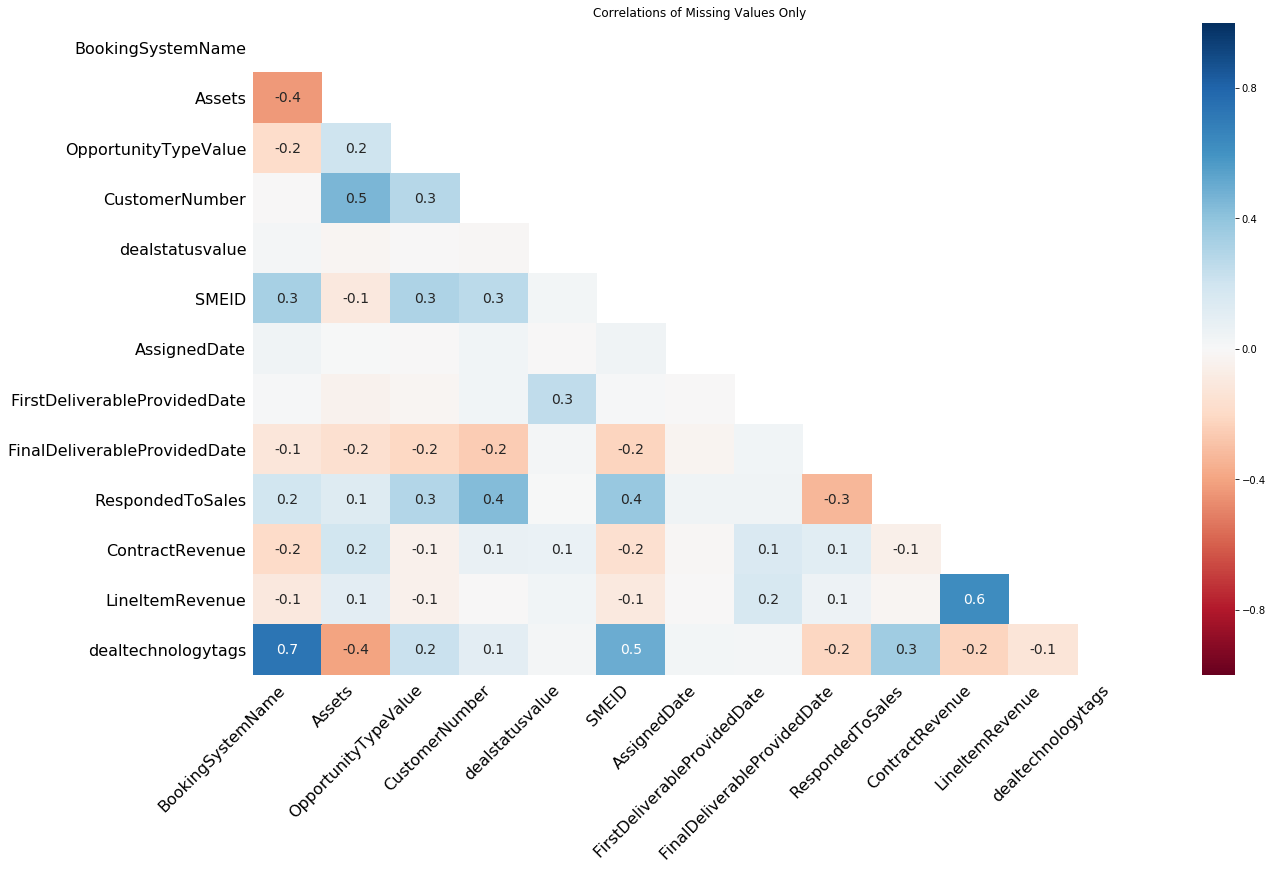

In [104]:
#visualize patterns of missingness
plt.figure()
msno.heatmap(df)
plt.title('Correlations of Missing Values Only')

#### BookingSystemName

In [105]:
df['BookingSystemName'].isna().sum()

2376

In [106]:
#BookingSystemName - Use most common occuring value
mask = df['BookingSystemName'].isna()
most_common = df['BookingSystemName'].value_counts().index[0]
df.loc[mask,'BookingSystemName'] = most_common

#### Assets missing values

In [107]:
df['Assets'].isna().sum()

3474

In [108]:
#Assets - APPROACH TBC, using average as a place holder
mask = df['Assets'].isna()
average_nona = df['Assets'][-mask].mean()
df.loc[mask,'Assets'] = average_nona

In [109]:
average_nona

892.1828612405881

#### OpportunityTypeValue

In [110]:
df['OpportunityTypeValue'].isna().sum()

317

In [111]:
#OpportunityTypeValue - use the most common value
mask = df['OpportunityTypeValue'].isna()
most_common = df['OpportunityTypeValue'].value_counts().index[0]
df.loc[mask,'OpportunityTypeValue'] = most_common

#### CustomerNumber

In [112]:
df['CustomerNumber'].isna().sum()

2507

In [113]:
#CustomerNumber - if customer number appears less than 5 times, bucket into unique category, use CustomerNumber otherwise
cust_counts = df['CustomerNumber'].value_counts()
cust_list = cust_counts[cust_counts >= 5].index.tolist()
df['CustomerNumber'] = np.where(df['CustomerNumber'].isin(cust_list),df['CustomerNumber'],0)
df['CustomerNumber'] = df['CustomerNumber'].astype(object)

#### Dealstatusvalue

In [114]:
df['dealstatusvalue'].isna().sum()

2

In [115]:
#Dealstatusvalue - change to Won
mask = df['dealstatusvalue'].isna()
df.loc[mask,'dealstatusvalue'] = "Won"

#### SMEID

In [116]:
df['SMEID'].isna().sum()

2284

In [117]:
#SMEID - if null or equal to the TechnologySolutionOwnerBadge, code 0, otherwise 1
df['SMEID'] = np.where(df['SMEID'].isnull(),0,df['SMEID'])
df['SMEID'] = np.where(df['SMEID'] == df['OwnerID'],0,1)

#### Assigned Date

In [118]:
df['AssignedDate'].isna().sum()

6

In [119]:
#Assigned Date - Impute from Intake Date
mask = df['AssignedDate'].isna()
df['AssignedDate'] = np.where(mask, df['IntakeDate'], df['AssignedDate'])

#### First Deliverable Provided

In [120]:
df['FirstDeliverableProvidedDate'].isna().sum()

30

In [121]:
#First Deliverable Provided - impute final deliverable provided where available
mask = df['FirstDeliverableProvidedDate'].isna()
df['FirstDeliverableProvidedDate'] = np.where(mask, df['FinalDeliverableProvidedDate'], 
                                              df['FirstDeliverableProvidedDate'])
#drop other rows
df = df.dropna(axis=0, subset=['FirstDeliverableProvidedDate'])

#### Contract Revenue

In [122]:
df['ContractRevenue'].isna().sum()

436

In [123]:
#Impute from Line Item Revenue where available
mask = df['ContractRevenue'].isna()
df['ContractRevenue'] = np.where(mask, df['LineItemRevenue'], df['ContractRevenue'])

#Fill rest with average of column
mask = df['ContractRevenue'].isna()
average_nona = df['ContractRevenue'][-mask].mean()
df.loc[mask,'ContractRevenue'] = average_nona

#### Line Item Revenue

In [124]:
df['LineItemRevenue'].isna().sum()

322

In [125]:
#Impute from Contract Revenue where available
mask = df['LineItemRevenue'].isna()
df['LineItemRevenue'] = np.where(mask, df['ContractRevenue'], df['LineItemRevenue'])

#Fill rest with average of column
mask = df['LineItemRevenue'].isna()
average_nona = df['LineItemRevenue'][-mask].mean()
df.loc[mask,'LineItemRevenue'] = average_nona

#### Drop Columns outside initial analysis

In [126]:
#Drop columns outside initial analysis
df = df.drop(columns=['FinalDeliverableProvidedDate', 'RespondedToSales'])

#### Inspect columns and export csv

In [127]:
df.isna().sum()

MyDealId                           0
BookingSystemName                  0
Assets                             0
IsPrimary                          0
OpportunityTypeValue               0
CustomerNumber                     0
dealstatusvalue                    0
RegionValue                        0
CountryValue                       0
OwnerID                            0
TechnologySolutionOwnerBadge       0
SMEID                              0
LOBNAME                            0
Technologyname                     0
Fiscal Year                        0
Fiscal Quarter                     0
Fiscal Week                        0
IntakeDate                         0
AssignedDate                       0
FirstDeliverableProvidedDate       0
ContractRevenue                    0
LineItemRevenue                    0
dealtechnologytags              3216
Time in Job Profile                0
dtype: int64

In [129]:
print('Total rows remaining: ', len(df))

Total rows remaining:  6242


In [128]:
df.to_csv('DataExtract_v4.csv', index=False) #export CSV file provided